## Install autofaiss image_embeddings and huggingface multilingual clip

In [ ]:
!pip install -U image_embeddings # don't run this line if running this directly in the repo

import subprocess
CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)

if CUDA_version == "10.0":
    torch_version_suffix = "+cu100"
elif CUDA_version == "10.1":
    torch_version_suffix = "+cu101"
elif CUDA_version == "10.2":
    torch_version_suffix = ""
else:
    torch_version_suffix = "+cu110"

!pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex
!pip install ftfy==5.8
!pip install transformers

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os, random
import torch

import warnings
warnings.filterwarnings("ignore")

!pip install git+https://github.com/openai/CLIP.git
import clip

!git clone https://github.com/FreddeFrallan/Multilingual-CLIP
%cd Multilingual-CLIP
!bash get-weights.sh

!pip install autofaiss

     |████████████████████████████████| 92kB 3.8MB/s 
     |████████████████████████████████| 7.0MB 14.4MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
  Created wheel for image-embeddings: filename=image_embeddings-1.4.0-cp37-none-any.whl size=13140 sha256=81a1a36e77be90ca8818e3f5e9f14a304a6c01d712204c02e7b9acf93681bb78
  Stored in directory: /root/.cache/pip/wheels/ed/4b/03/d57a2985ed7c15388608e4d73fc2e70a15b65b1a5518af5a61
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=ffc5d66372ba4c8692a8a4f431d42b0cb3354b0e4604d17375619ffeceb90a2e
  Stored in directory: /root/.cache/pip/wheels/af/19/30/1ea0cad502dcb4e66ed5a690279628c827aea38bbbab75d5ed
Successfully built image-embeddings fire
CUDA version: 11.0
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1MB 1.4MB/s eta 0:03:52tcmalloc: large alloc 1147494400 bytes == 0x55c88fca4000 @  0x7f7605aec615 0x55c856458cdc 0x55c85653852a



```
# This is formatted as code
```

## Download dataset

In [ ]:
import image_embeddings
# Let's define some paths where to save images, tfrecords and embeddings
from pathlib import Path
home = str(Path.home())
dataset = "imagewang/160px"
path_images = f"{home}/{dataset}/images"
image_embeddings.downloader.save_examples_to_folder(output_folder=path_images, images_count=1000, dataset=dataset)

INFO:absl:Load pre-computed DatasetInfo (eg: splits, num examples,...) from GCS: imagewang/160px/2.0.0
INFO:absl:Load dataset info from /tmp/tmp64gphlagtfds
INFO:absl:Field info.description from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.config_name from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.config_description from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.citation from disk and from code do not match. Keeping the one from code.
INFO:absl:Generating dataset imagewang (/root/tensorflow_datasets/imagewang/160px/2.0.0)


INFO:absl:Downloading https://s3.amazonaws.com/fast-ai-imageclas/imagewang-160.tgz into /root/tensorflow_datasets/downloads/s3_fast-ai-imageclas_imagewang-160Wjn3EednW17ryj6bXjYb-LpRkDkr1BMPgToSh-DNwuU.tgz.tmp.0f1426a30acc4490aa69763a41b275f2...
INFO:absl:Generating split train


Shuffling and writing examples to /root/tensorflow_datasets/imagewang/160px/2.0.0.incompleteVVZTDC/imagewang-train.tfrecord


INFO:absl:Done writing /root/tensorflow_datasets/imagewang/160px/2.0.0.incompleteVVZTDC/imagewang-train.tfrecord. Shard lengths: [14669]
INFO:absl:Generating split validation


Shuffling and writing examples to /root/tensorflow_datasets/imagewang/160px/2.0.0.incompleteVVZTDC/imagewang-validation.tfrecord


INFO:absl:Done writing /root/tensorflow_datasets/imagewang/160px/2.0.0.incompleteVVZTDC/imagewang-validation.tfrecord. Shard lengths: [3929]
INFO:absl:Skipping computing stats for mode ComputeStatsMode.SKIP.


INFO:absl:Constructing tf.data.Dataset for split train, from /root/tensorflow_datasets/imagewang/160px/2.0.0


Dataset imagewang downloaded and prepared to /root/tensorflow_datasets/imagewang/160px/2.0.0. Subsequent calls will reuse this data.


## Run inference with clip to get image embeddings

### Load clip

In [ ]:
from src import multilingual_clip
text_model = multilingual_clip.load_model('M-BERT-Distil-40')

clip_model, compose = clip.load('RN50x4')

input_resolution = clip_model.input_resolution.item()
context_length = clip_model.context_length.item()
vocab_size = clip_model.vocab_size.item()

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in clip_model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

INFO:filelock:Lock 140652806155728 acquired on /root/.cache/huggingface/transformers/32a0aaf2e0a61babcd5a31b043cd24c26ee7ca5e488602000c0bb739539aa7b3.3880ed3035decebb04ccc39fade77c25d16f697fcd22197fa3cd826a7e29a4af.lock


INFO:filelock:Lock 140652806155728 released on /root/.cache/huggingface/transformers/32a0aaf2e0a61babcd5a31b043cd24c26ee7ca5e488602000c0bb739539aa7b3.3880ed3035decebb04ccc39fade77c25d16f697fcd22197fa3cd826a7e29a4af.lock


INFO:filelock:Lock 140652832040464 acquired on /root/.cache/huggingface/transformers/fc57c7a4e0da8a97ab4d8193f7799ee4324b281462686ed648e506bdd58bebf5.6c5b6600e968f4b5e08c86d8891ea99e51537fc2bf251435fb46922e8f7a7b29.lock


INFO:filelock:Lock 140652832040464 released on /root/.cache/huggingface/transformers/fc57c7a4e0da8a97ab4d8193f7799ee4324b281462686ed648e506bdd58bebf5.6c5b6600e968f4b5e08c86d8891ea99e51537fc2bf251435fb46922e8f7a7b29.lock


INFO:filelock:Lock 140652806155664 acquired on /root/.cache/huggingface/transformers/d433376e6258ed9d36127437940ef4b1a8feaef9aba914319dfb8c7930ba6ab6.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb55ed556bdd80611d.lock


INFO:filelock:Lock 140652806155664 released on /root/.cache/huggingface/transformers/d433376e6258ed9d36127437940ef4b1a8feaef9aba914319dfb8c7930ba6ab6.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb55ed556bdd80611d.lock


INFO:filelock:Lock 140652806227728 acquired on /root/.cache/huggingface/transformers/efad406679e3904060c4b8e96b5d47c638bd19c8c30334e961d471478245c2e2.ed96bea534c558bd666bbaaaaf0da1c6fe84ad475df9caa8e79b9db3f5badd64.lock


INFO:filelock:Lock 140652806227728 released on /root/.cache/huggingface/transformers/efad406679e3904060c4b8e96b5d47c638bd19c8c30334e961d471478245c2e2.ed96bea534c558bd666bbaaaaf0da1c6fe84ad475df9caa8e79b9db3f5badd64.lock


INFO:filelock:Lock 140652805022672 acquired on /root/.cache/huggingface/transformers/fb9209ab247a3535264dfb06415fecdce2b39677daf630094a769acbf84a50d2.10efa560e0ac3b2030e11346bcad2fbf4fe8c9ec24abd67398f6b334fc1d242c.lock


INFO:filelock:Lock 140652805022672 released on /root/.cache/huggingface/transformers/fb9209ab247a3535264dfb06415fecdce2b39677daf630094a769acbf84a50d2.10efa560e0ac3b2030e11346bcad2fbf4fe8c9ec24abd67398f6b334fc1d242c.lock


100%|███████████████████████████████████████| 422M/422M [00:35<00:00, 11.8MiB/s]


Model parameters: 178,300,601
Input resolution: 288
Context length: 77
Vocab size: 49408


### Load and show pictures

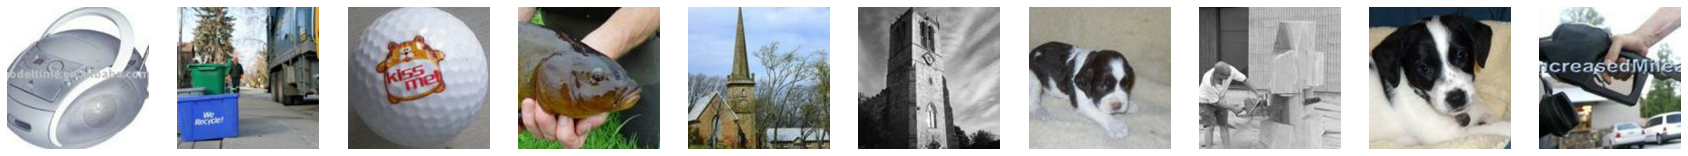

In [ ]:
import glob
from PIL import Image
images_imagenet = glob.glob(path_images+"/*.jpeg")
images = [Image.open(p) for p in images_imagenet]

fig = plt.figure()
fig.set_size_inches(30,5)
for i, img in enumerate(images[:10]):
  a=fig.add_subplot(1,len(images[:10]), i+1)
  plt.imshow(img, )
  plt.axis('off')

### Clip inference

In [ ]:
from tqdm import trange

image_normalized_embs = None
with torch.no_grad():
    l = len(images)
    batch_size = 100
    for i in trange(1+int((l-1) / batch_size)):
      img_input = torch.stack([compose(img).to('cuda') for img in images[i*batch_size:((i+1)*batch_size)]])
      batched = img_input
      batched_emb = clip_model.encode_image(batched).float().to('cpu')
      batched_emb_norm = batched_emb / batched_emb.norm(dim=-1, keepdim=True)
      if image_normalized_embs is None:
        image_normalized_embs = batched_emb_norm
      else:
        image_normalized_embs = torch.cat([image_normalized_embs, batched_emb_norm])

print("CLIP-Vision: {}".format(image_normalized_embs.shape))

100%|██████████| 10/10 [00:37<00:00,  3.74s/it]

CLIP-Vision: torch.Size([1000, 640])


In [ ]:
import numpy as np
np.save("lol.emb", image_normalized_embs)

## Use autofaiss

In [ ]:
!rm -rf embeddings my_index_folder
os.mkdir("embeddings")
np.save("embeddings/part1.npy", image_normalized_embs)
os.mkdir("my_index_folder")

In [ ]:
!autofaiss quantize --embeddings_path="embeddings" --output_path="my_index_folder" --metric_type="ip"


Launching the whole pipeline 05/21/2021, 08:20:26
	Compute estimated construction time of the index 05/21/2021, 08:20:26
		-> Train: 16.7 minutes
		-> Add: 0.0 seconds
		Total: 16.7 minutes
	>>> Finished "Compute estimated construction time of the index" in 0.0001 secs
	Checking that your have enough memory available to create the index 05/21/2021, 08:20:26
	>>> Finished "Checking that your have enough memory available to create the index" in 0.0006 secs
	Selecting most promising index types given data characteristics 05/21/2021, 08:20:26
	>>> Finished "Selecting most promising index types given data characteristics" in 0.0019 secs
	Creating the index 05/21/2021, 08:20:26
		-> Instanciate the index HNSW32 05/21/2021, 08:20:26
		>>> Finished "-> Instanciate the index HNSW32" in 0.0026 secs
		-> Extract training vectors 05/21/2021, 08:20:26
100% 1/1 [00:00<00:00, 1051.99it/s]
		>>> Finished "-> Extract training vectors" in 0.0041 secs
		-> Training the index with 1000 vectors of dim 640 

## Visualization

In [ ]:
#@title Do a knn query
import faiss
import glob
import numpy as np

my_index = faiss.read_index(glob.glob("my_index_folder/*.index")[0])

query = 'a dog on the road' #@param {type:"string"}

text_emb = text_model(query)
text_emb_normalized = (text_emb / text_emb.norm(dim=-1, keepdim=True)).detach().numpy()

k = 10 #@param {type:"number"}
distances, indices = my_index.search(text_emb_normalized, k)



from ipywidgets import widgets, HBox, VBox
from IPython.display import Image, display

hbox = HBox(
    [
        VBox(
            [
                widgets.Label(str(d)),
                widgets.Image(value=open(images_imagenet[ind], "rb").read()),
            ]
        ) for i, (d, ind) in enumerate(zip(distances[0], indices[0]))
    ]
)
display(hbox)